### TPOT  (Tree-based Pipeline Optimisation Technique):
TPOT will automate the most tedious part of machine learning by intelligently exploring thousands of possible pipelines to find the best one for your data. TPOT is built on top of scikit-learn. And is still under-development.

Note: Skip the installation part if you already have TPOT installed on your system

Features:


<table>
  <thead>
    <tr>
      <th>Feature</th>
      <th>Availability</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>AutoML</td>
      <td>Partially</td>
    </tr>
    <tr>
      <td>Installation</td>
      <td>Easy</td>
    </tr>
    <tr>
      <td>Automated Model Selection</td>
      <td>Yes</td>
    </tr>
    <tr>
      <td>Pipeline (ready-to-run code of model)</td>
      <td>Yes</td>
    </tr>
    <tr>
      <td>Data Cleaning</td>
      <td>No</td>
    </tr>
     <tr>
      <td>Visualization</td>
      <td>No</td>
    </tr>
    <tr>
      <td>Supports Ensemble</td>
      <td>Yes</td>
    </tr>
    <tr>
      <td>Manual Configuration Option</td>
      <td>Yes</td>
    </tr>
    </tr><tr>
      <td>Performance accuracy Option</td>
      <td>Yes</td>
    </tr>
  </tbody>
</table>

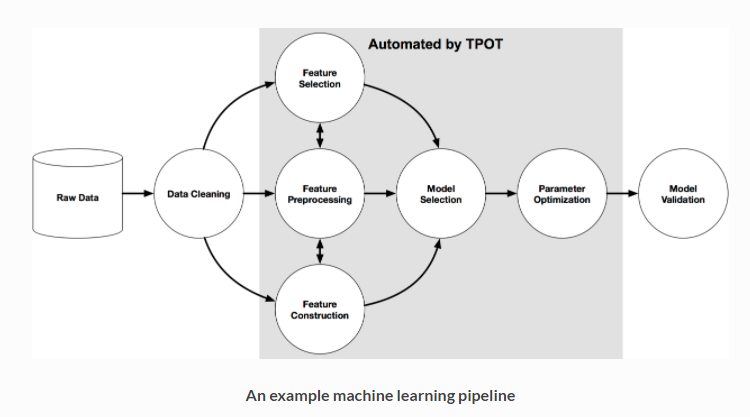

In [1]:
from IPython.display import Image
Image("tpot.PNG")

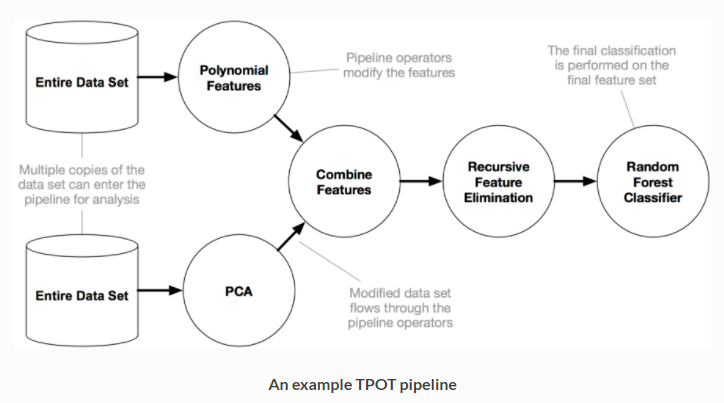

In [2]:
from IPython.display import Image
Image("tpot2.PNG")

## TPOT Installation:
TPOT is built on top of several existing Python libraries, including:

1. NumPy
2. SciPy
3. scikit-learn
4. DEAP
5. update_checker
6. tqdm
7. stopit
8. pandas

!pip install deap update_checker tqdm stopit
###### If you plan to use the TPOT-MDR configuration, make sure to install scikit-mdr and scikit-rebate:
!pip install scikit-mdr skrebate
###### Install TPOT:
!pip install tpot

## TPOT API:
Classification

class tpot.TPOTClassifier(generations=100, population_size=100,
                          offspring_size=None, mutation_rate=0.9,
                          crossover_rate=0.1,
                          scoring='accuracy', cv=5,
                          subsample=1.0, n_jobs=1,
                          max_time_mins=None, max_eval_time_mins=5,
                          random_state=None, config_dict=None,
                          warm_start=False,
                          periodic_checkpoint_folder=None,
                          verbosity=0,
                          disable_update_check=False)

## Using TPOT:

### IRIS Dataset Example:

The Iris Dataset. This data sets consists of 3 different types of irises' (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray. The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width. The below plot uses the first two features.

In [3]:
from tpot import TPOTClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data.astype(np.float64),
    iris.target.astype(np.float64), train_size=0.8, test_size=0.2)

tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)
print("Accuracy of the test set is: " + str(tpot.score(X_test, y_test))) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Generation 1 - Current best internal CV score: 0.9753043478260869


Generation 2 - Current best internal CV score: 0.9833043478260869


Generation 3 - Current best internal CV score: 0.9833043478260869


Generation 4 - Current best internal CV score: 0.9833043478260869


Generation 5 - Current best internal CV score: 0.9833043478260869



Best pipeline: ExtraTreesClassifier(RBFSampler(ZeroCount(input_matrix), gamma=0.85), bootstrap=False, criterion=entropy, max_features=0.95, min_samples_leaf=13, min_samples_split=10, n_estimators=100)
Accuracy of the test set is: 0.933333333333


### Our Dataset Example:

The dataset contains subject, messages and a class. There are 3 classes. We are going to preprocess the data to using basic NLP techniques to create a dataset with TF and TF-IDF from the messages. The goal is to use TPOT to classify a three classes and compare performance.

##### Import Libraries

In [4]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Data Reading & filtering relevant variables:

In [5]:
df = pd.read_csv("test.csv", encoding = "ISO-8859-1")
# Checking the data
df.head(5)

,Subject,Message,Class
0,Enq ref: 12345678 Missing Bank Statement - A...,"Hi, For reference, I attach a copy of an ea...",Credit and account statements
1,CBO-2291811 Statement needed,Please could you help us identify the Credit ...,Credit and account statements
2,DWF LLP,Sort Codeæ 30-00-01 Account numberæ 012345678...,Credit and account statements
3,ABC Industries - Bank Statement Queries,Hi Lloyd's Banking Please can I query the fo...,Credit and account statements
4,URGENT Statements,"Hi team, Spoke to Peter this morning, I do n...",Credit and account statements


In [6]:
messages = df[['Class','Message']]

##### Data Exploration

In [7]:
messages.groupby('Class').describe()

Message         \
                                count unique   
Class                                          
Account closures                   20     20   
Credit and account statements      20     20   
Direct debit and Bacs              21     21   

                                                                                  \
                                                                             top   
Class                                                                              
Account closures               Hi,\r\rOne of the account connected with our M...   
Credit and account statements  Hi ,  In our account with sort code : 30-00-01...   
Direct debit and Bacs          Good morning, The direct debited we have setup...   

                                    
                              freq  
Class                               
Account closures                 1  
Credit and account statements    1  
Direct debit and Bacs            1

In [8]:
messages['length'] = messages['Message'].apply(len)
messages.head()

,Class,Message,length
0,Credit and account statements,"Hi, For reference, I attach a copy of an ea...",315
1,Credit and account statements,Please could you help us identify the Credit ...,363
2,Credit and account statements,Sort Codeæ 30-00-01 Account numberæ 012345678...,183
3,Credit and account statements,Hi Lloyd's Banking Please can I query the fo...,438
4,Credit and account statements,"Hi team, Spoke to Peter this morning, I do n...",455


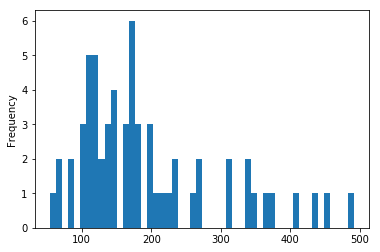

In [9]:
# Histogram of Messages lenghts
messages['length'].plot(bins=50,kind = 'hist')

In [10]:
messages['length'].describe()

count     61.000000
mean     194.344262
std      102.707982
min       54.000000
25%      123.000000
50%      168.000000
75%      236.000000
max      492.000000
Name: length, dtype: float64

In [11]:
# Checking longest message
messages[messages['length'] == 492]['Message'].iloc[0]

' Good Morning,  I have attempted to call your corporate telephone service, but have been unable to get through security as the statements we hold on the account are too old.æ Please can I request a PDF statement for the CBCA Trust loan account from 05/01/2016 to current day.æ The account details are as follows:  Sort Code: 30-00-01 Account Number: 1234567 Account Name: CBCA Trust   If there is anything further that you require from me, then please let me know.  Thank you,  Kind regards, '

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EFB1630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000F196208>]], dtype=object)

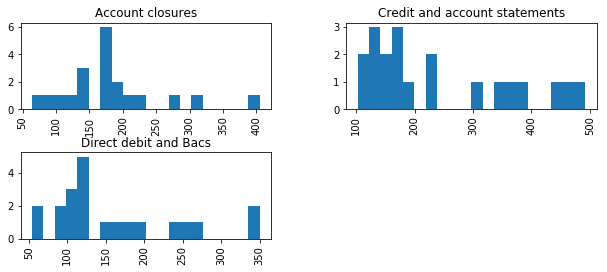

In [12]:
# Message length histogram by classes
messages.hist(column='length',by ='Class',bins=20,figsize = (10,4))

##### Data Cleaning

In [13]:
import string
from nltk.corpus import stopwords
import re
import itertools

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove numbers mixed with letters from string
    3. Remove just numbers
    4. Split Attached Words
    5. Standardizing words: Sometimes words are not in proper formats. For example: “I looooveee you” should be “I love you”. 
    6. Remove words with length less than equal to 2
    7. Remove all stopwords
    8. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Remove numbers mixed with letter eg: 27Jan2017
    pattern = re.compile(r"\d*([^\d\W]+)\d*")
    cleaned = pattern.sub(r"\1", nopunc)
    
    # Remove numbers
    cleaned = " ".join(re.findall("[a-zA-Z]+", cleaned))

    # Split attachedd words
    cleaned = " ".join(re.findall('[A-Z][^A-Z]*', cleaned))
    
    # Standardizing words: Sometimes words are not in proper formats. For example: “I looooveee you” should be “I love you”. 
    cleaned = ''.join(''.join(s)[:2] for _, s in itertools.groupby(cleaned))
    
    # Remove words with length less than equal to 2
    cleaned = re.sub(r'\b\w{1,3}\b', '', cleaned)
    
    # Now just remove any stopwords
    return [word for word in cleaned.split() if word.lower() not in stopwords.words('english')]

In [14]:
messages['Message'].head(5).apply(text_process)

0    [reference, attach, copy, earlier, statement, ...
1    [Please, could, help, identify, Credit, accoun...
2    [Sort, Code, Account, number, Please, tell, ba...
3    [Lloyds, Banking, Please, query, following, en...
4    [team, Spoke, Peter, morning, access, closing,...
Name: Message, dtype: object

##### Data Munging using TF

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
transformer = CountVectorizer(analyzer=text_process)
dtm = transformer.fit_transform(messages['Message'])

In [17]:
print ('Shape of dataframe: ', dtm.shape)
print ('Amount of Non-Zero occurences: ', dtm.nnz)
print ('sparsity: %.2f%%' % (100.0 * dtm.nnz /
                             (dtm.shape[0] * dtm.shape[1])))

Shape of dataframe:  (61, 302)
Amount of Non-Zero occurences:  807
sparsity: 4.38%


In [19]:
X_all = pd.DataFrame(dtm.toarray(), columns=transformer.get_feature_names())
le = preprocessing.LabelEncoder()
le.fit(messages['Class'])
Y_all = le.transform(messages['Class']) 

##### Data Split Train and Test

In [20]:
# Split the data into 80% Train and rest as test
X_train, X_test, y_train, y_test = train_test_split(X_all.astype(np.float64),
    Y_all, train_size=0.8, test_size=0.2)

##### Modeling

In [26]:
tpot = TPOTClassifier(generations=20, population_size=30, verbosity=2)
tpot.fit(X_train, y_train)

Generation 1 - Current best internal CV score: 0.8695959595959597


Generation 2 - Current best internal CV score: 0.8695959595959597


Generation 3 - Current best internal CV score: 0.8695959595959597


Generation 4 - Current best internal CV score: 0.8723737373737374


Generation 5 - Current best internal CV score: 0.8964141414141414


Generation 6 - Current best internal CV score: 0.8964141414141414


Generation 7 - Current best internal CV score: 0.8964141414141414


Generation 8 - Current best internal CV score: 0.8964141414141414


Generation 9 - Current best internal CV score: 0.8964141414141414


Generation 10 - Current best internal CV score: 0.8964141414141414


Generation 11 - Current best internal CV score: 0.8964141414141414


Generation 12 - Current best internal CV score: 0.8964141414141414


Generation 13 - Current best internal CV score: 0.8964141414141414


Generation 14 - Current best internal CV score: 0.8964141414141414


Generation 15 - Current best internal CV score: 0.8964141414141414


Generation 16 - Current best internal CV score: 0.8964141414141414


Generation 17 - Current best internal CV score: 0.8964141414141414


Generation 18 - Current best internal CV score: 0.8964141414141414


Generation 19 - Current best internal CV score: 0.8964141414141414


Generation 20 - Current best internal CV score: 0.8964141414141414



Best pipeline: LinearSVC(RobustScaler(input_matrix), C=0.1, dual=True, loss=hinge, penalty=l2, tol=0.01)


TPOTClassifier(config_dict={'sklearn.naive_bayes.GaussianNB': {}, 'sklearn.naive_bayes.BernoulliNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.naive_bayes.MultinomialNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.tree.DecisionT....45,
        0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,
        0.95,  1.  ])}}}},
        crossover_rate=0.1, cv=5, disable_update_check=False,
        early_stop=None, generations=20, max_eval_time_mins=5,
        max_time_mins=None, mutation_rate=0.9, n_jobs=1, offspring_size=30,
        periodic_checkpoint_folder=None, population_size=30,
        random_state=None, scoring=None, subsample=1.0, verbosity=2,
        warm_start=False)

In [27]:
print("Accuracy of the test set is: " + str(tpot.score(X_test, y_test))) 

Accuracy of the test set is: 0.692307692308


##### Viewing all TPOT's evaluated algorithms

In [28]:
tpot.evaluated_individuals_

{'BernoulliNB(BernoulliNB(input_matrix, BernoulliNB__alpha=0.1, BernoulliNB__fit_prior=False), BernoulliNB__alpha=0.001, BernoulliNB__fit_prior=False)': (2,
  0.84737373737373733),
 'BernoulliNB(Binarizer(Binarizer(input_matrix, Binarizer__threshold=0.85), Binarizer__threshold=0.25), BernoulliNB__alpha=0.001, BernoulliNB__fit_prior=False)': (3,
  0.84737373737373733),
 'BernoulliNB(Binarizer(input_matrix, Binarizer__threshold=0.85), BernoulliNB__alpha=0.001, BernoulliNB__fit_prior=False)': (2,
  0.84737373737373733),
 'BernoulliNB(CombineDFs(MinMaxScaler(input_matrix), input_matrix), BernoulliNB__alpha=0.1, BernoulliNB__fit_prior=False)': (2,
  0.85419191919191917),
 'BernoulliNB(CombineDFs(RBFSampler(input_matrix, RBFSampler__gamma=0.2), input_matrix), BernoulliNB__alpha=0.1, BernoulliNB__fit_prior=False)': (2,
  0.79560606060606065),
 'BernoulliNB(CombineDFs(input_matrix, input_matrix), BernoulliNB__alpha=0.01, BernoulliNB__fit_prior=False)': (1,
  0.84737373737373733),
 'BernoulliNB

### Demonstration of TPOT pipeline

In [29]:
print("Accuracy of the test set is: " + str(tpot.score(X_test, y_test))) 
tpot.export('tpot_pipeline.py')

True

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.svm import LinearSVC

# NOTE: Make sure that the class is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=42)

# Score on the training set was:0.8964141414141414
exported_pipeline = make_pipeline(
    RobustScaler(),
    LinearSVC(C=0.1, dual=True, loss="hinge", penalty="l2", tol=0.01)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)
